# Brain Age Prediction RandomForest

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from base_regressor import BaseRegressor
from Plotter import Plotter

from skopt.space import Real, Categorical, Integer

class RFRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="MLP"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml= RandomForestRegressor
        self.params = {
            'n_estimators': 100,
            'max_depth': None,
            'min_samples_split': 2,
            'min_samples_leaf': 1,            
            'bootstrap': True
        }
        
        self.params_space = {
            'n_estimators': Integer(30, 100),
            'max_depth': Integer(2, 4),
            'min_samples_split': Integer(2, 10),
            'min_samples_leaf': Integer(2, 10),
            #'max_features': Categorical([ 'sqrt', 'log2']),
            #'bootstrap': [True, False] 
        }


In [26]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = RFRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'green'
nameset = 'Random Forest'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=3

#scaler = MinMaxScaler()
Scaler_reg = MinMaxScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [27]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=20, scoring_metric='neg_mean_absolute_error')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [7]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

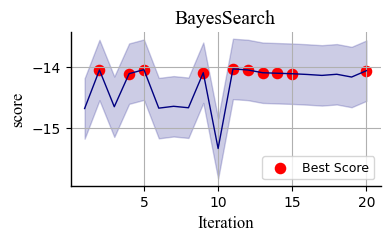

Top 1: Iteration 11, Score -14.028950945513719
Top 2: Iteration 5, Score -14.04121120777495
Top 3: Iteration 12, Score -14.045713522693319
Top 4: Iteration 2, Score -14.046867621611359
Top 5: Iteration 20, Score -14.057831161185954
Top 6: Iteration 9, Score -14.091440276120744
Top 7: Iteration 13, Score -14.091858036280357
Top 8: Iteration 14, Score -14.100547907594478
Top 9: Iteration 4, Score -14.106916940007551
Top 10: Iteration 15, Score -14.108462881740621


In [28]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [34]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'max_depth': 4,
  'min_samples_leaf': 10,
  'min_samples_split': 2,
  'n_estimators': 30},
 {'max_depth': 4,
  'min_samples_leaf': 6,
  'min_samples_split': 6,
  'n_estimators': 80},
 {'max_depth': 4,
  'min_samples_leaf': 7,
  'min_samples_split': 2,
  'n_estimators': 74},
 {'max_depth': 4,
  'min_samples_leaf': 9,
  'min_samples_split': 4,
  'n_estimators': 97},
 {'max_depth': 4,
  'min_samples_leaf': 10,
  'min_samples_split': 2,
  'n_estimators': 97},
 {'max_depth': 4,
  'min_samples_leaf': 8,
  'min_samples_split': 9,
  'n_estimators': 59},
 {'max_depth': 4,
  'min_samples_leaf': 10,
  'min_samples_split': 2,
  'n_estimators': 100},
 {'max_depth': 4,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 30},
 {'max_depth': 4,
  'min_samples_leaf': 3,
  'min_samples_split': 7,
  'n_estimators': 86},
 {'max_depth': 4,
  'min_samples_leaf': 10,
  'min_samples_split': 10,
  'n_estimators': 30}]

In [20]:
best_params=opt_model.best_params_

# Training

In [30]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [14]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [15]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [16]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     647.4
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          1.48e-116
Time:                        11:52:49   Log-Likelihood:                -4685.3
No. Observations:                1323   AIC:                             9375.
Df Residuals:                    1321   BIC:                             9385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2048      0.580     58.959      0.0

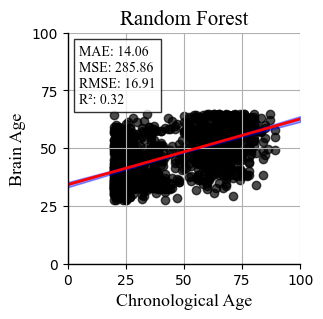

Error medio absoluto: 14.062430721604038
Error cuadrático medio: 285.8615827205036
Raíz del error cuadrático medio: 16.90744163735317
Coeficiente de determinación (R²): 0.3228940715401064


In [31]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1347.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          7.35e-204
Time:                        11:52:53   Log-Likelihood:                -4542.2
No. Observations:                1323   AIC:                             9088.
Df Residuals:                    1321   BIC:                             9099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.1601      0.521     57.925      0.0

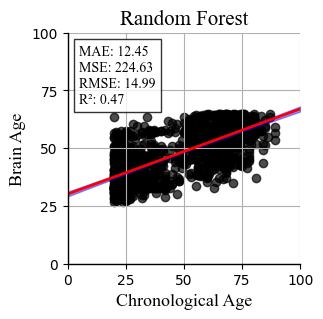

Error medio absoluto: 12.446044589652855
Error cuadrático medio: 224.6322523788581
Raíz del error cuadrático medio: 14.987736733038052
Coeficiente de determinación (R²): 0.4679249014102852


In [32]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Train Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     6709.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:53:01   Log-Likelihood:                -4686.5
No. Observations:                1323   AIC:                             9377.
Df Residuals:                    1321   BIC:                             9387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0135      0.581      6.912      0.0

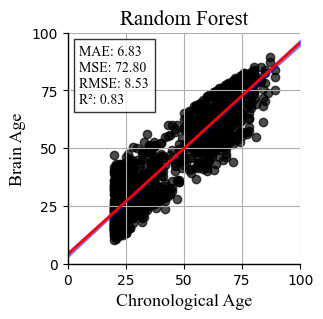

Error medio absoluto: 6.826651185653468
Error cuadrático medio: 72.79818973224798
Raíz del error cuadrático medio: 8.532185519094623
Coeficiente de determinación (R²): 0.8275665957637695


In [33]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [12]:
shap_summary_sorted_CN

[('Low_subj_spec_EPP_OCC_right', 2888.393700739021),
 ('IAF_OCC_left', 2323.152837016431),
 ('Low_subj_spec_RPD_CING_right', 1857.7020069175946),
 ('IAF_OCC_right', 1397.0237341658428),
 ('Low_subj_spec_EPP_PARIET_left', 1209.3835692757114),
 ('High_subj_spec_EPP_CING_right', 983.3483053205434),
 ('High_subj_spec_RPD_CING_right', 977.5543372215533),
 ('Alpha2_canon_RPD_CING_right', 801.5512283878213),
 ('Alpha2_canon_EPP_HPC_left', 772.4187899835072),
 ('Alpha2_canon_RPD_HPC_left', 765.5129014135363),
 ('Low_subj_spec_RPD_HPC_left', 669.3894109970623),
 ('Low_subj_spec_EPP_PARIET_right', 664.2032679574382),
 ('Low_subj_spec_RPD_OCC_left', 629.4619753895003),
 ('Low_subj_spec_RPD_CING_left', 577.4391364785688),
 ('Low_subj_spec_RPD_PARIET_left', 526.5953889431008),
 ('Alpha2_canon_RPD_PARIET_left', 433.10286322409956),
 ('Alpha2_canon_EPP_PARIET_left', 423.9610852760007),
 ('Low_subj_spec_RPD_HPC_right', 392.72911614222784),
 ('IAF_INS_left', 346.9916667417485),
 ('Alpha2_canon_RPD_HPC_

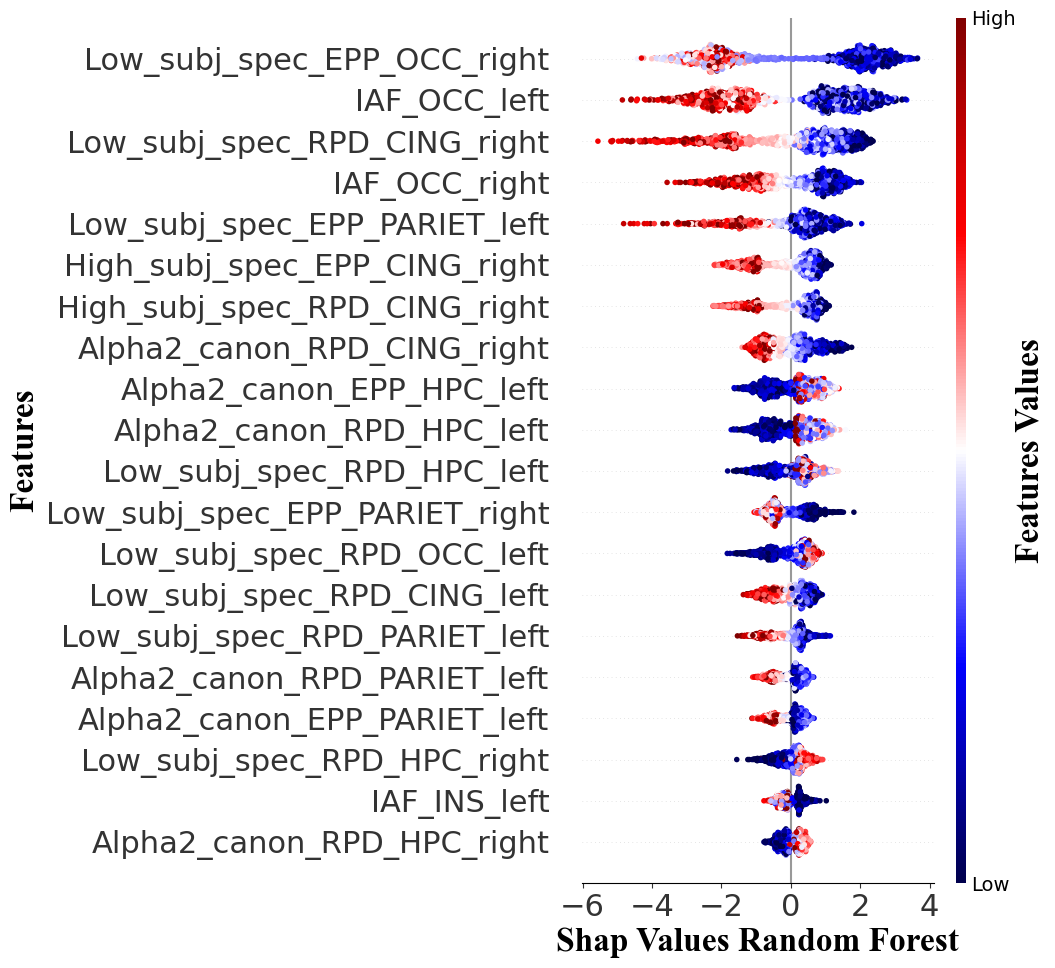

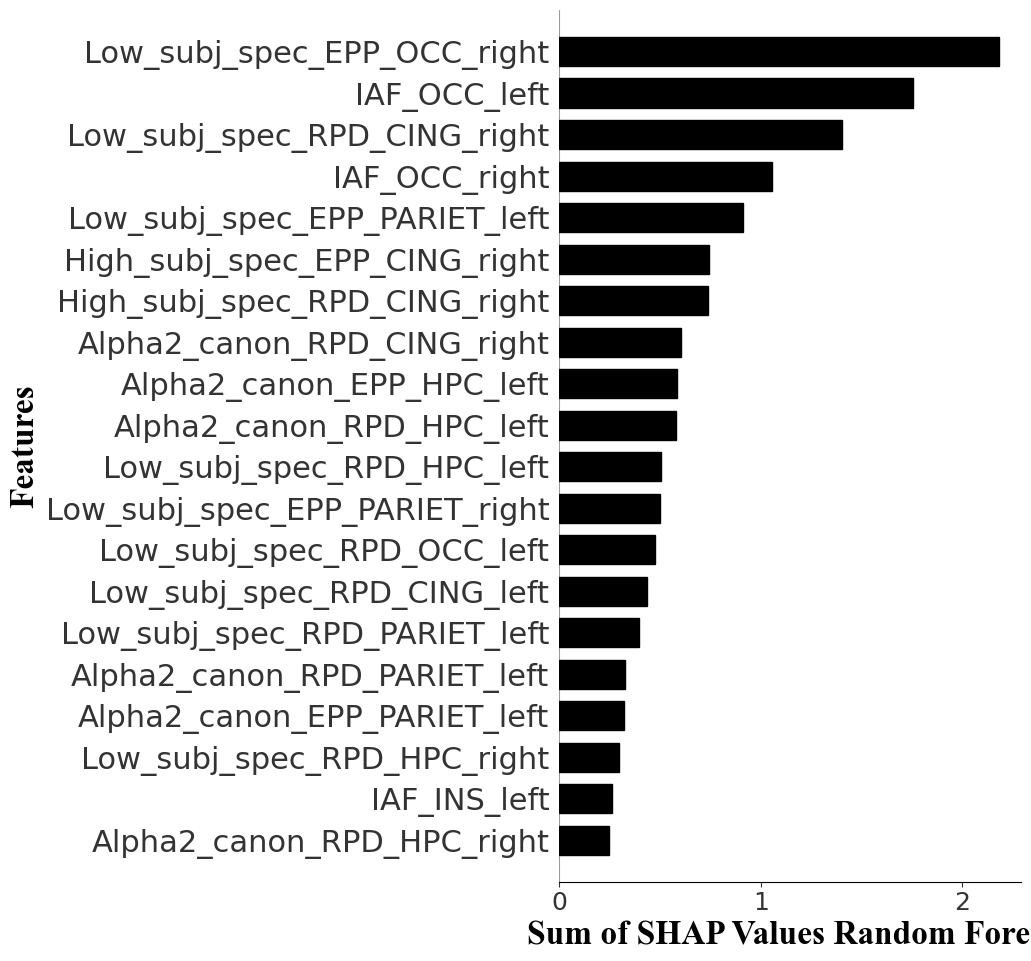

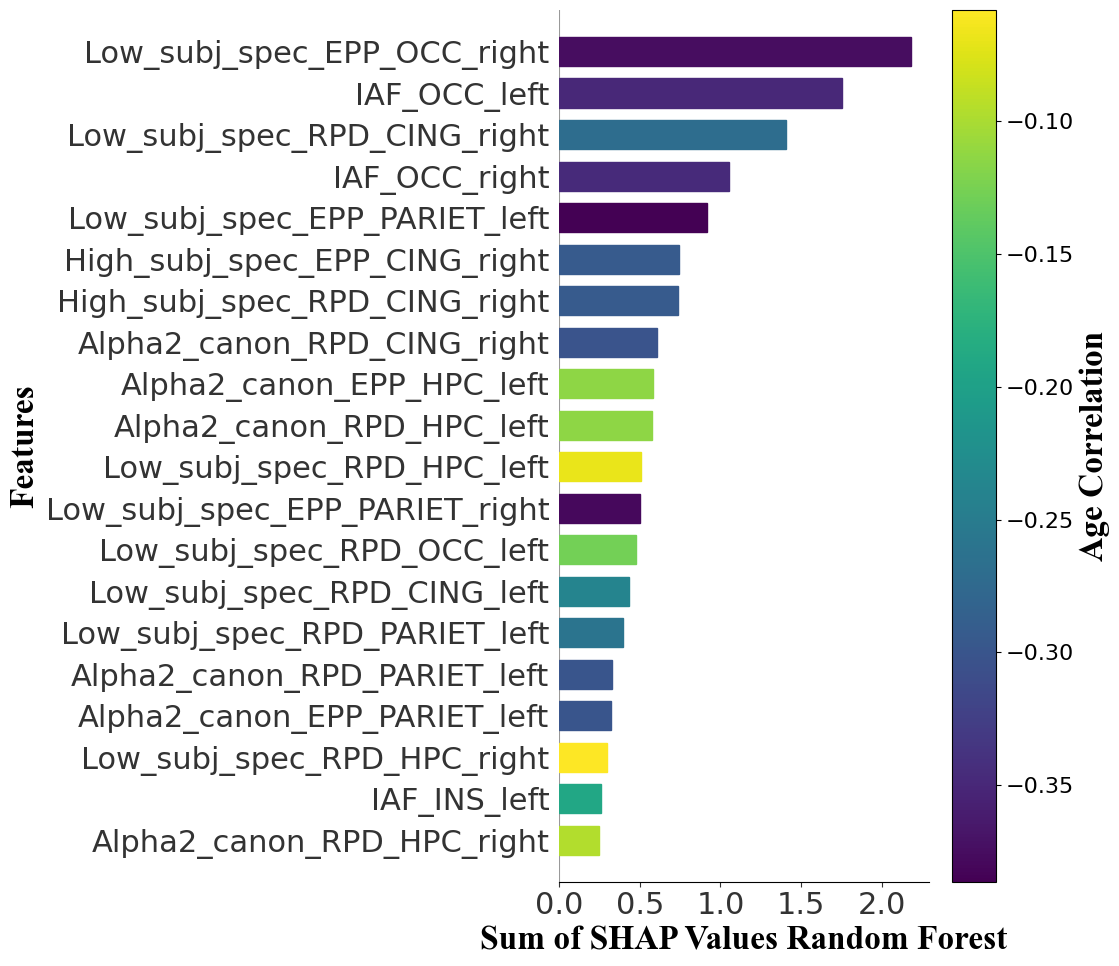

In [20]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [14]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=1)

OCC_right: 1.000000


In [15]:
shap_por_region_sorted

{'OCC_right': 2888.393700739021}

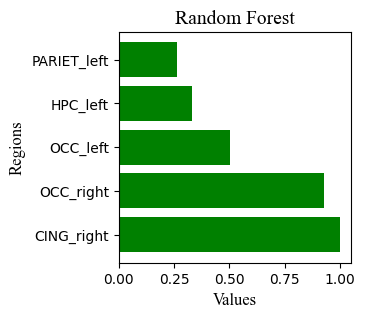

In [10]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


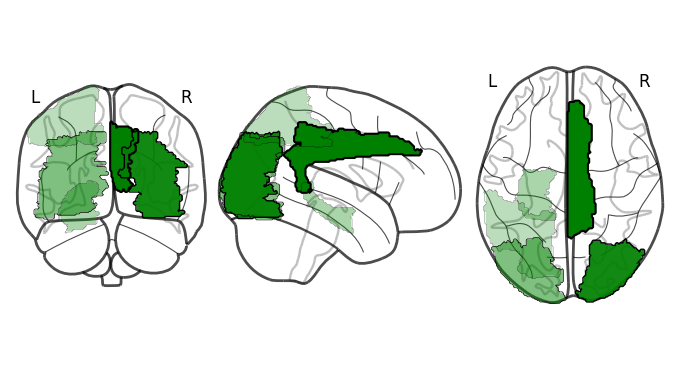

In [11]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)